In [1]:
import numpy as np
import math
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


random.seed(45)
def simulated_annealing(temperature):
    current_r_values = []
    ans_values = []
    ite = []
    count_1 = 0
    count_2 = 0
    i = 0

    current_r = random.uniform(-1, 1)
    # Iterate 1000 times
    for num in range(1000):
        new_r = random.uniform(-1, 1)

        while current_r == new_r:
            new_r = random.uniform(-1, 1)

        def energy_function(x):
            return x ** 2

        f_1 = energy_function(current_r)
        f_2 = energy_function(new_r)

        delta_e = f_2 - f_1

        if delta_e < 0:
            current_r = new_r
            count_1 = count_1+1
        else:
            ans = math.exp(-1 * delta_e / temperature)
            ans_r = random.uniform(0, 1)

            if ans > ans_r:
                current_r = new_r
                count_2 = count_2 + 1

        i = i + 1
        # Store values for plotting
        current_r_values.append(current_r)
        ans_values.append(energy_function(current_r))
        ite.append(i)
    total_acceptance = count_1+count_2
    return total_acceptance


In [2]:
print("Total acceptance value for 100K:",simulated_annealing(100))

Total acceptance value for 100K: 998


In [3]:
def temp(temp):
  temperature = []
  acceptance_rate = []
  alpha = 0.5 # How quickly system temperature decrease over the time

  while temp > 0:
    temperature.append(temp)
    acceptance_rate.append((simulated_annealing(temp)/1000)*100)
    temp = temp*alpha

  return [temperature,acceptance_rate]



In [4]:
Starting_Temperature = 1000
result = temp(Starting_Temperature)
temperature_Anneling = pd.DataFrame({
    "temperature" : result[0],
    "percent" : result[1]
})

In [5]:
temperature_Anneling.shape

(1085, 2)

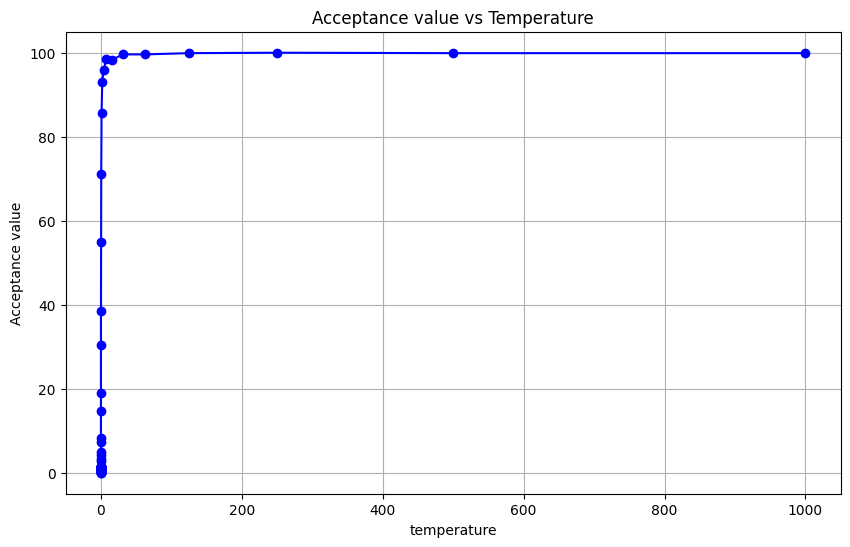

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(temperature_Anneling['temperature'], temperature_Anneling['percent'], marker='o', linestyle='-', color='b')
plt.xlabel('temperature')
plt.ylabel('Acceptance value')
plt.title('Acceptance value vs Temperature')
plt.grid(True)
plt.show()

In [ ]:
def simulated_annealing_max(temperature):
    current_r_values = []
    ans_values = []
    ite = []

    i = 0

    current_r = random.uniform(-1, 1)
    # Iterate 1000 times
    for num in range(1000):
        new_r = random.uniform(-1, 1)

        while current_r == new_r:
            new_r = random.uniform(-1, 1)

        def energy_function(x):
            return x ** 2

        f_1 = energy_function(current_r)
        f_2 = energy_function(new_r)

        delta_e = f_2 - f_1

        if delta_e < 0:
            current_r = new_r

        else:
            ans = math.exp(-1 * delta_e / temperature)
            ans_r = random.uniform(0, 1)

            if ans > ans_r:
                current_r = new_r

        i = i + 1
        # Store values for plotting
        current_r_values.append(current_r)
        ans_values.append(energy_function(current_r))
        ite.append(i)

    return np.max(current_r_values) # Find the maximum of the current values

In [ ]:
def temperature_with_max(temp):
  temp_lst = []
  mean_lst = []
  alpha = 0.5

  while temp > 0:
    temp_lst.append(temp)
    mean_lst.append(simulated_annealing_max(temp)) # Storing mean value of the each temperature
    temp = temp * alpha

  return [temp_lst,mean_lst]

In [ ]:
starting_Temperature = 500
result_max = temperature_with_max(starting_Temperature)
temperature_Anneling_max = pd.DataFrame({
    "temperature" : result_max[0],
    "max" : result_max[1]
})

In [ ]:
temperature_Anneling_max.head(6)

,temperature,max
0,500.000,0.998634
1,250.000,0.996283
2,125.000,0.999591
3,62.500,0.998536
4,31.250,0.998468
5,15.625,0.999928


In [ ]:
temperature_Anneling_max.shape

(1084, 2)

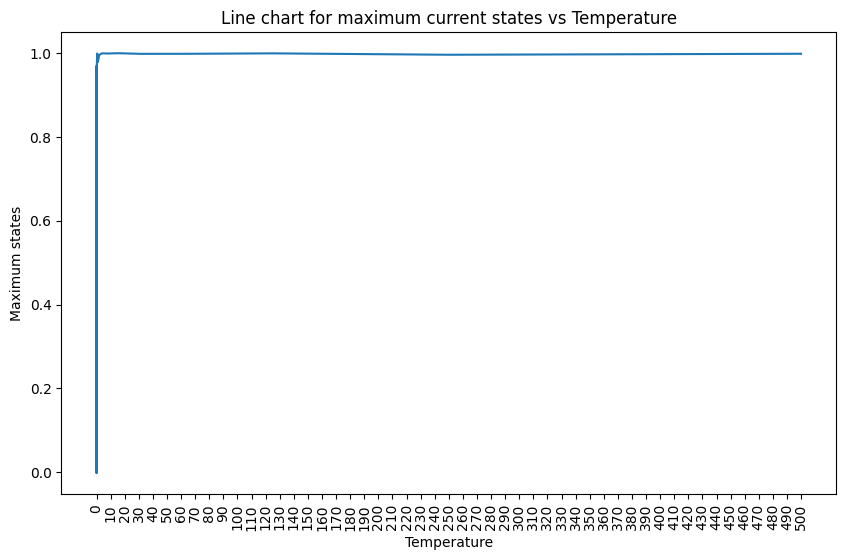

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(temperature_Anneling_max['temperature'],temperature_Anneling_max['max'])
plt.xticks(range(0, 501, 10), rotation=90)
plt.title("Line chart for maximum current states vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("Maximum states")
plt.show()

In [ ]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f